In [261]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
from scipy.stats import norm
from plotly import tools
import datetime as dt

init_notebook_mode(connected=True)

In [ ]:
# Read Data Frame and Create Original Copy
df = pd.read_csv('loan.csv', low_memory=False)
original_df = df.copy()

# Pull info of each field
df.info()

In [2]:
# Rename certain columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

# Drop irrelevant columns
df.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

C:\Users\Suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Committeed by Investors')

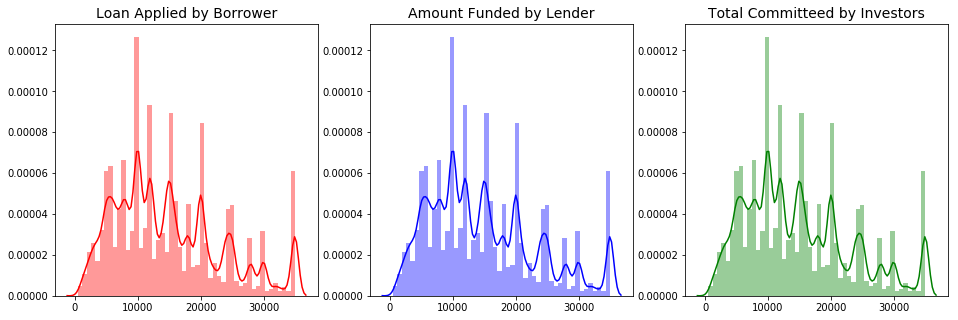

In [3]:
# Explore distribution of loan amount to see when loan amount issued increased significantly
fig, ax = plt.subplots(1,3,figsize=(16,5))

loan_amount = df['loan_amount'].values
funded_amount = df['funded_amount'].values
investor_funds = df['investor_funds'].values

sns.distplot(loan_amount, ax=ax[0], color='r')
ax[0].set_title('Loan Applied by Borrower', fontsize=14)
sns.distplot(loan_amount, ax=ax[1], color='b')
ax[1].set_title('Amount Funded by Lender', fontsize=14)
sns.distplot(loan_amount, ax=ax[2], color='g')
ax[2].set_title('Total Committeed by Investors', fontsize=14)

In [4]:
# Transform the issue dates by year
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

C:\Users\Suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average Loan Amount Issued')

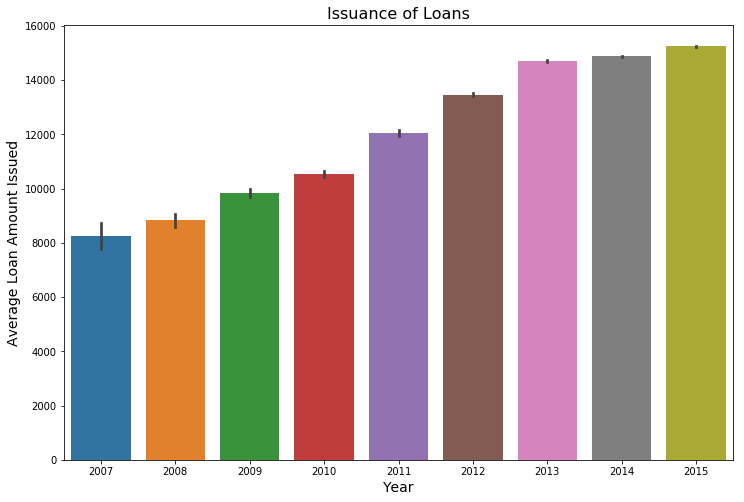

In [5]:
# Plot average annual loan amount issued
plt.figure(figsize=(12,8))
sns.barplot('year','loan_amount', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Loan Amount Issued', fontsize=14)

In [6]:
# Explore type of loan (good vs bad)
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]

def loan_condition(status):
    if status in bad_loan:
        return "Bad Loan"
    else:
        return "Good Loan"
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

df['loan_condition'].value_counts()

Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

C:\Users\Suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'(%)')]

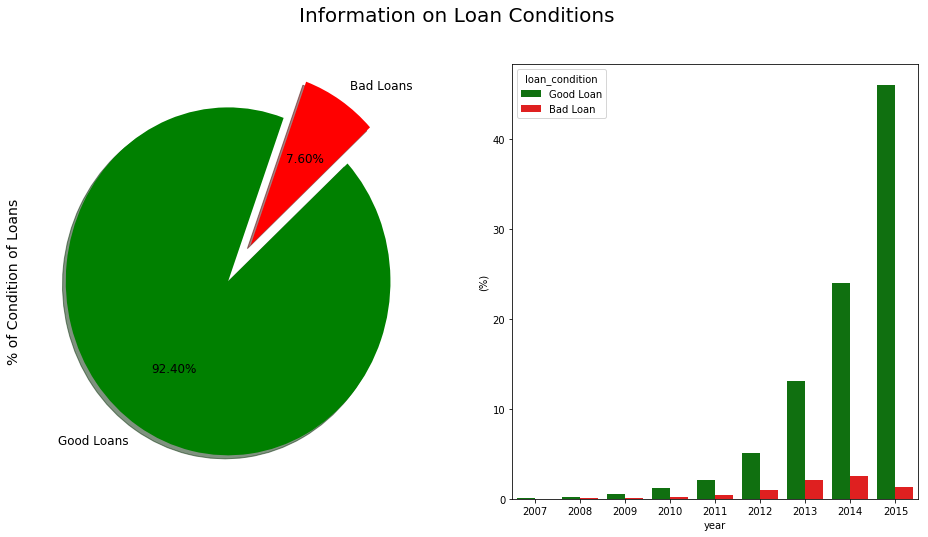

In [7]:
# Plot Pie Chart and Bar Graop of Good Loan vs Bad Loan
fig, ax = plt.subplots(1,2, figsize=(16,8))
colors = ['g','r']
labels = "Good Loans", "Bad Loans"
plt.suptitle("Information on Loan Conditions", fontsize=20)

df['loan_condition'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.barplot(x='year',y='loan_amount', hue='loan_condition', data=df, palette=colors, estimator=lambda x: len(x)/len(df)*100)
ax[1].set(ylabel="(%)")

In [8]:
# Explor loans issued by region

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'South West'
    elif state in south_east:
        return 'South East'
    elif state in mid_west:
        return 'Mid West'
    elif state in north_east:
        return 'North East'
    
df['region'] = df['addr_state'].apply(finding_regions)

# Convert Date to year-month format
df['complete_date'] = pd.to_datetime(df['issue_d'])
group_dates = df.groupby(['complete_date','region'], as_index=False).sum()
group_dates['issue_d'] = [month.to_period('M') for month in group_dates['complete_date']]
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000
df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])

Text(0.5,1,'Loans issued by Region')

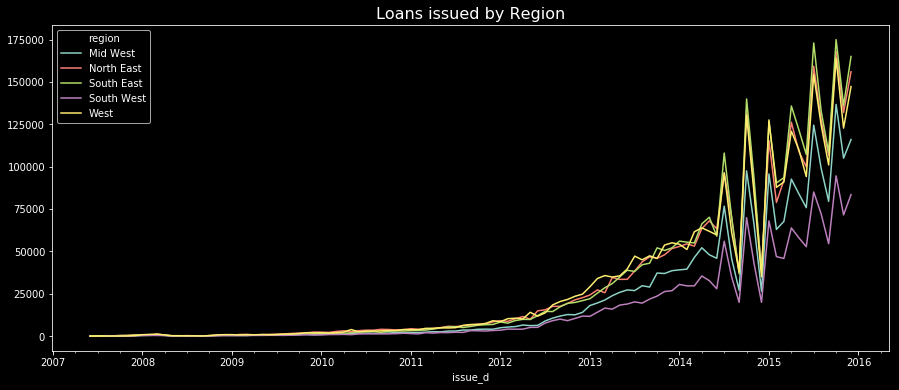

In [9]:
# Plot line graph to show loan issue over time
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d','region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))
plt.title('Loans issued by Region', fontsize=16)

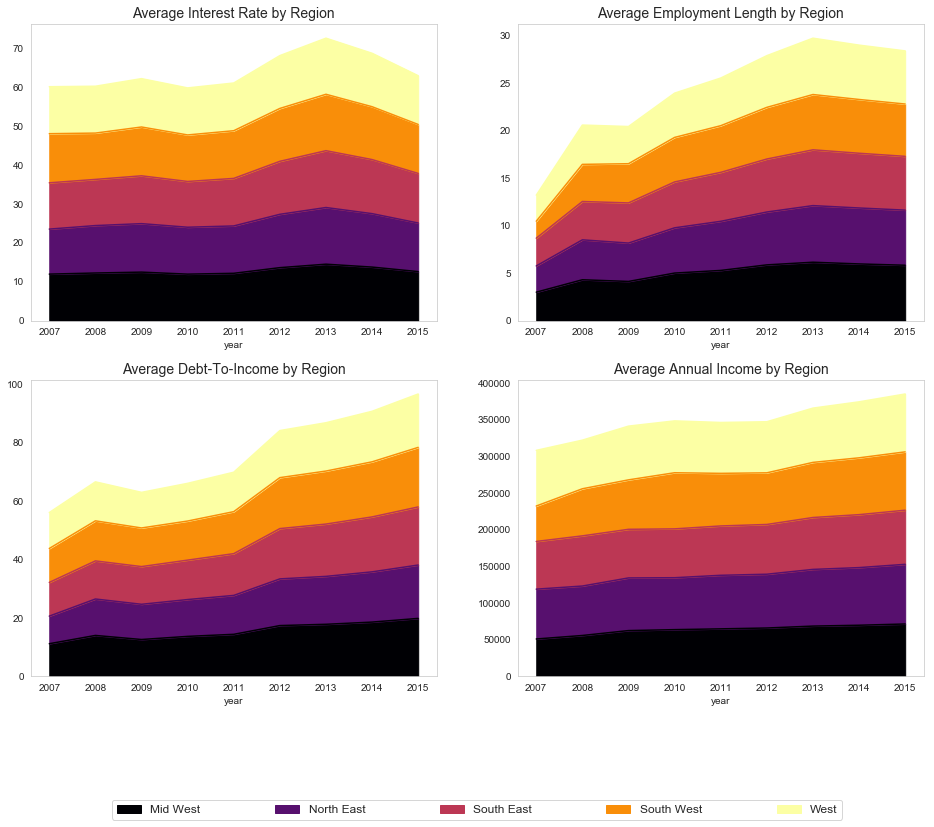

In [56]:
# Explore employment length, interest rate, debt to income ratio, and income annually

def employment_years(string):
    if string[:3] == '10+':
        return 10
    elif string[:3] == '< 1':
        return 0.5
    elif string == 'nan':
        return 0
    else:
        return string[:1]

df['emp_length'].fillna(0, inplace=True)
df['emp_length'] = df['emp_length'].astype(str)
df['emp_length_int'] = df['emp_length'].apply(employment_years).astype(int)

# Plot data
sns.set_style('whitegrid')
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)
cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)

by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-To-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10, prop={'size':12},ncol=5,mode='expand',borderaxespad=0.)

In [75]:
# Explore Bad Loans
badloans_df = df[df['loan_condition'] == 'Bad Loan']

loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum()*100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])

loan_status_cross = loan_status_cross.apply(lambda x: round(x,2))

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1)

charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
not_meet_credit = loan_status_cross['Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()

charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)

credit_policy = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= not_meet_credit,
    name='Does not meet Credit Policy',
    marker = dict(
        color='rgb(229, 121, 36)'
    ),
    text = '%'
)

grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)', 
    marker = dict(
        color='rgb(246, 157, 135)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)

data = [charged, defaults, credit_policy, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [93]:
# Explore Business Operations
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region','addr_state'], as_index=False).annual_income.mean()

states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()

from collections import OrderedDict
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df = metrics_df.astype(str)

scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

C:\Users\Suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



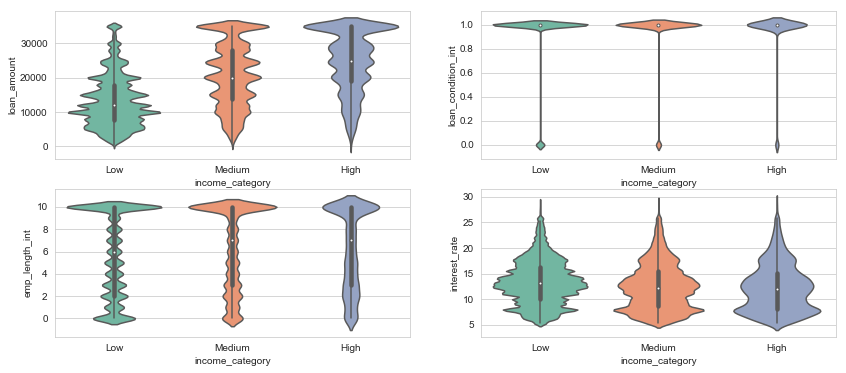

In [107]:
# Analysis by Income Category

def income_category(value):
    if value <= 100000:
        return "Low"
    elif value <= 200000:
        return "Medium"
    else:
        return "High"
    
df['income_category'] = df['annual_income'].apply(income_category)
df['loan_condition_int'] = df['loan_condition'].apply(lambda x: 1 if x=='Good Loan' else 0).astype(int)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(14,6))
sns.violinplot(x='income_category',y='loan_amount',data=df,palette='Set2',ax=ax1)
sns.violinplot(x='income_category',y='loan_condition_int',data=df,palette='Set2',ax=ax2)
sns.violinplot(x='income_category',y='emp_length_int',data=df,palette='Set2',ax=ax3)
sns.violinplot(x='income_category',y='interest_rate',data=df,palette='Set2',ax=ax4)

In [117]:
# Explore Risks of Business

by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/df.groupby('addr_state')['loan_condition'].count()
by_emp_length = df.groupby(['region','addr_state'], as_index=False).emp_length_int.mean().sort_values(by='addr_state')

loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'])
cross_condition = pd.crosstab(df['addr_state'], df['loan_condition'])
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_condition']).apply(lambda x: x/x.sum()*100)
condition_ratio = cross_condition['Bad Loan']/cross_condition['Good Loan']
by_dti = df.groupby(['region','addr_state'], as_index=False).dti.mean()
state_codes=sorted(states)

default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()

risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])

risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df = risk_df.astype(str)

In [119]:
# Plot Risk Data

scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

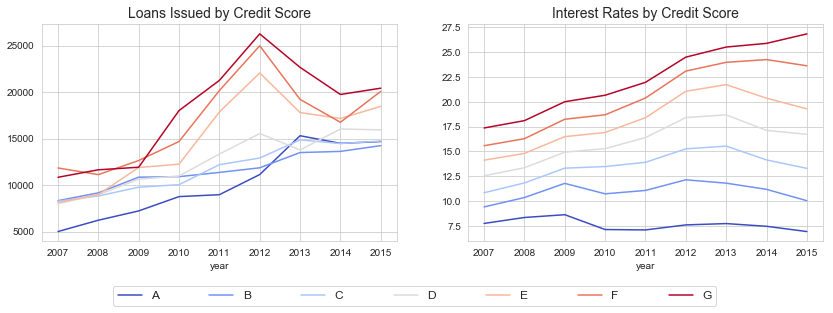

In [122]:
# Explore credit scores (Average Loans Issued and Interest Rates)

fig, ((ax1,ax2)) = plt.subplots(1,2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year','grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14,4), colormap=cmap)
ax1.set_title('Loans Issued by Credit Score', fontsize=14)

by_inc = df.groupby(['year','grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14,4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0,-0.3,1.7,0.1), loc=5, prop={'size':12}, ncol=7, mode='expand', borderaxespad=0)

Text(0,0.5,'Interest Rate (%)')

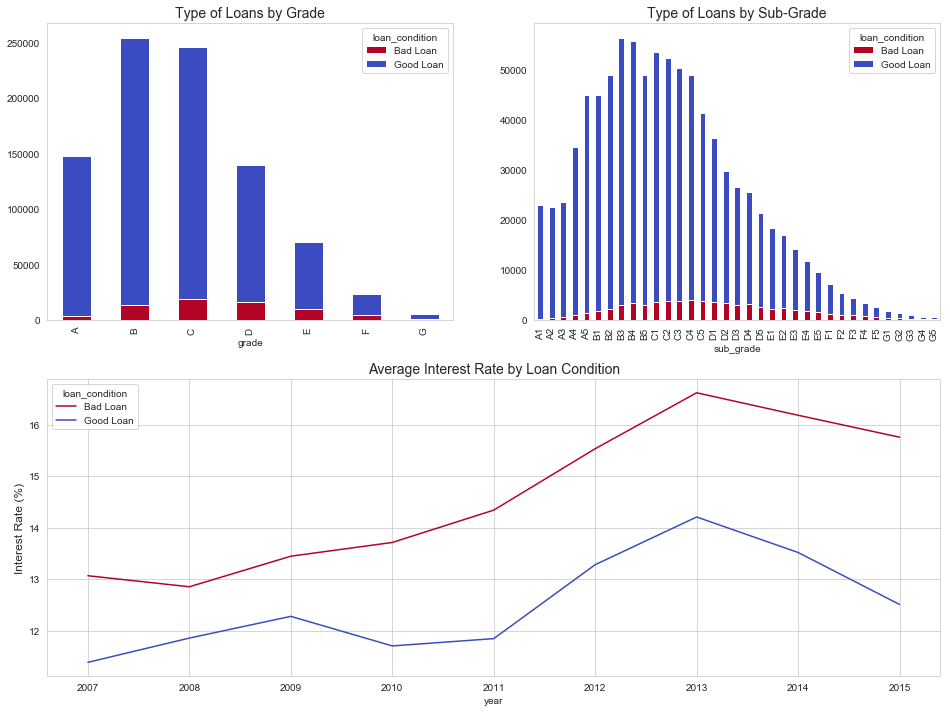

In [126]:
# Explore credit scores (Type of Loans)

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
cmap = plt.cm.coolwarm_r

loans_by_region = df.groupby(['grade','loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)

loans_by_grade = df.groupby(['sub_grade','loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = df.groupby(['year','loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest Rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

In [132]:
# Explore what determines a Bad Loan

numeric_variables = df.select_dtypes(exclude=['object'])
df_correlations = df.corr()

trace = go.Heatmap(z=df_correlations.values, x=df_correlations.columns, y=df_correlations.columns,
                  colorscale="Viridis", colorbar=dict(title='Level of Correlation', titleside='top',
                                                    tickmode='array'))
layout = {'title': 'Correlation Heatmap'}
data=[trace]

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

In [141]:
# Explore Bad Loan Statuses

title = 'Bad Loans: Loan Statuses'
labels = bad_loan

colors = ['rgba(236, 112, 99, 1)', 'rgba(235, 152, 78, 1)', 'rgba(52, 73, 94, 1)', 'rgba(128, 139, 150, 1)',
         'rgba(255, 87, 51, 1)', 'rgba(255, 195, 0, 1)']

modesize = [8]*6
line_size = [2]*6
x_data = [sorted(df['year'].unique().tolist())]*6

charged_off = df['loan_amount'].loc[df['loan_status'] == 'Charged Off'].values.tolist()
defaults = df['loan_amount'].loc[df['loan_status'] == 'Default'].values.tolist()
not_credit_policy = df['loan_amount'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values.tolist()
grace_period = df['loan_amount'].loc[df['loan_status'] == 'In Grace Period'].values.tolist()
short_late = df['loan_amount'].loc[df['loan_status'] == 'Late (16-30 days)'].values.tolist()
long_late = df['loan_amount'].loc[df['loan_status'] == 'Late (31-120 days)'].values.tolist()

y_data = [charged_off,defaults,not_credit_policy,grace_period,short_late,long_late]

p_charged_off = go.Scatter(
    x = x_data[0],
    y = y_data[0],
    name = 'Charged Off',
    line = dict(
        color = colors[0],
        width = 3,
        dash='dash'))

p_defaults = go.Scatter(
    x = x_data[1],
    y = y_data[1],
    name = 'Defaults',
    line = dict(
        color = colors[1],
        width = 3,
        dash='dash'))

p_credit_policy = go.Scatter(
    x = x_data[2],
    y = y_data[2],
    name = 'Not Meet C.P',
    line = dict(
        color = colors[2],
        width = 3,
        dash='dash'))

p_graced = go.Scatter(
    x = x_data[3],
    y = y_data[3],
    name = 'Graced Period',
    line = dict(
        color = colors[3],
        width = 3,
        dash='dash'))

p_short_late = go.Scatter(
    x = x_data[4],
    y = y_data[4],
    name = 'Late (16-30 days)',
    line = dict(
        color = colors[4],
        width = 3,
        dash='dash'))

p_long_late = go.Scatter(
    x = x_data[5],
    y = y_data[5],
    name = 'Late (31-120 days)',
    line = dict(
        color = colors[5],
        width = 3,
        dash='dash'))

data=[p_charged_off, p_defaults, p_credit_policy, p_graced, p_short_late, p_long_late]

layout = dict(title = 'Types of Bad Loans <br> (Amount Borrowed Throughout the Years)',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Issued'))

fig = dict(data=data, layout=layout)
iplot(fig, filename='line-mode')

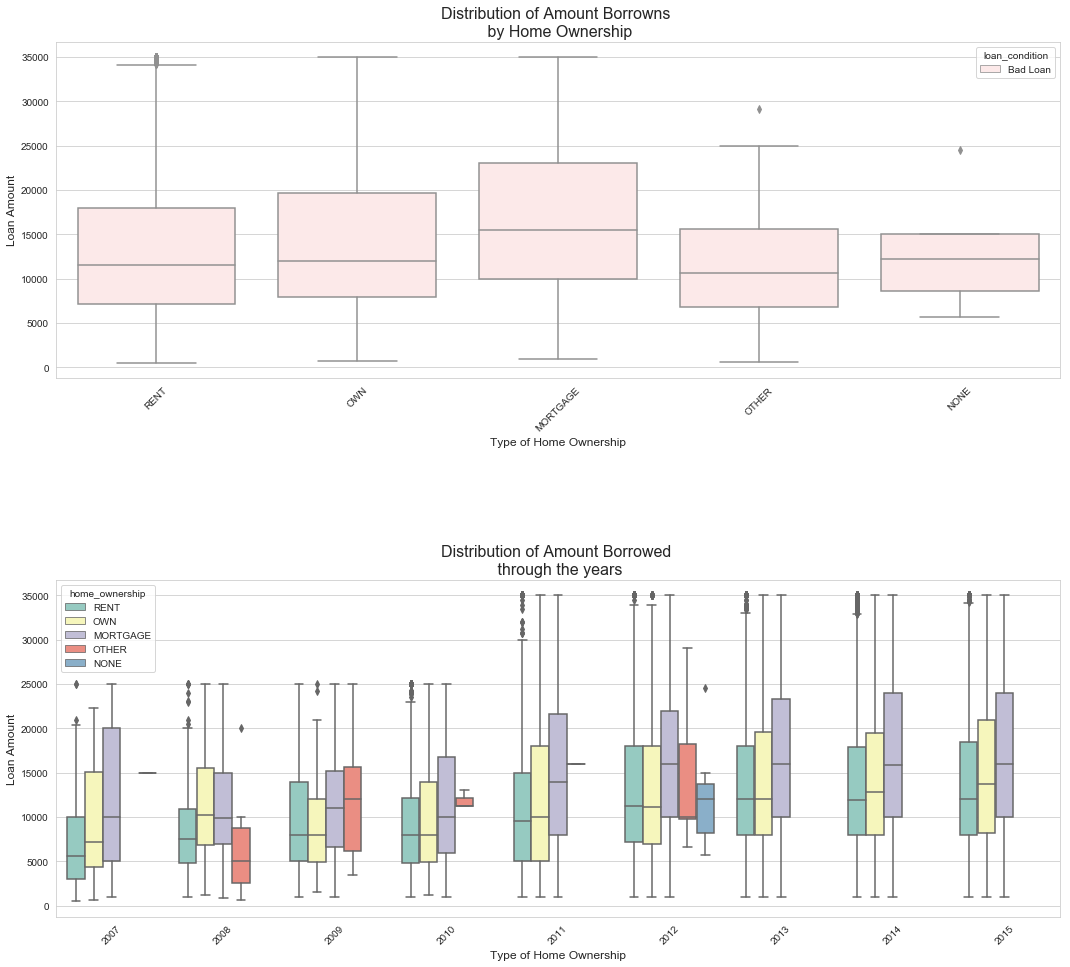

In [145]:
# Explore Distribution of Amount Borrowed by Home Ownership

plt.figure(figsize=(18,18))
bad_df = df[df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition', data=bad_df, color = 'r')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel('Type of Home Ownership', fontsize=12)
g.set_ylabel('Loan Amount', fontsize=12)
g.set_title('Distribution of Amount Borrowns \n by Home Ownership', fontsize=16)

plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership', data=bad_df, palette='Set3')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel('Type of Home Ownership', fontsize=12)
g1.set_ylabel('Loan Amount', fontsize=12)
g1.set_title('Distribution of Amount Borrowed \n through the years', fontsize=16)

plt.subplots_adjust(hspace=0.6, top=0.8)

plt.show()

In [151]:
# Explore Loan Defaults by Region

northe_defaults = df['loan_amount'].loc[(df['region'] == 'North East') & (df['loan_status'] == 'Default')].values.tolist()
southw_defaults = df['loan_amount'].loc[(df['region'] == 'South West') & (df['loan_status'] == 'Default')].values.tolist()
southe_defaults = df['loan_amount'].loc[(df['region'] == 'South East') & (df['loan_status'] == 'Default')].values.tolist()
west_defaults = df['loan_amount'].loc[(df['region'] == 'West') & (df['loan_status'] == 'Default')].values.tolist()
midw_defaults = df['loan_amount'].loc[(df['region'] == 'Mid West') & (df['loan_status'] == 'Default')].values.tolist()

y0_stck=northe_defaults
y1_stck=[y0+y1 for y0, y1 in zip(northe_defaults, southw_defaults)]
y2_stck=[y0+y1+y2 for y0, y1, y2 in zip(northe_defaults, southw_defaults, southe_defaults)]
y3_stck=[y0+y1+y2+y3 for y0, y1, y2, y3 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults)]
y4_stck=[y0+y1+y2+y3+y4 for y0, y1, y2, y3, y4 in zip(northe_defaults, southw_defaults, southe_defaults, west_defaults, midw_defaults)] 

y0_txt=['$' + str(y0) for y0 in northe_defaults]
y1_txt=['$' + str(y1) for y1 in southw_defaults]
y2_txt=['$' + str(y2) for y2 in southe_defaults]
y3_txt=['$' + str(y3) for y3 in west_defaults]
y4_txt=['$'+ str(y4) for y4 in midw_defaults]

year = sorted(df["year"].unique().tolist())

NorthEast_defaults = go.Scatter(
    x= year,
    y= y0_stck,
    text=y0_txt,
    hoverinfo='x+text',
    name='North East',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(131, 90, 241)'),
    fill='tonexty')

SouthWest_defaults = go.Scatter(
    x=year,
    y=y1_stck,
    text=y1_txt,
    hoverinfo='x+text',
    name='South West',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(255, 140, 0)'),
    fill='tonexty')

SouthEast_defaults = go.Scatter(
    x= year,
    y= y2_stck,
    text=y2_txt,
    hoverinfo='x+text',
    name='South East',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(240, 128, 128)'),
    fill='tonexty')

West_defaults = go.Scatter(
    x= year,
    y= y3_stck,
    text=y3_txt,
    hoverinfo='x+text',
    name='West',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(135, 206, 235)'),
    fill='tonexty')

MidWest_defaults = go.Scatter(
    x= year,
    y= y4_stck,
    text=y4_txt,
    hoverinfo='x+text',
    name='Mid West',
    mode= 'lines',
    line=dict(width=0.5,
             color='rgb(240, 230, 140)'),
    fill='tonexty')


data = [NorthEast_defaults, SouthWest_defaults, SouthEast_defaults, West_defaults, MidWest_defaults]

layout = dict(title = 'Amount Defaulted by Region',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Amount Defaulted'))

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic-area-no-bound')

In [153]:
# Average Interest Rate

df['interest_payments'] = df['interest_rate'].apply(lambda x: 'Low' if x<= 13.23 else 'High')

Low     465316
High    422063
Name: interest_payments, dtype: int64

C:\Users\Suraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



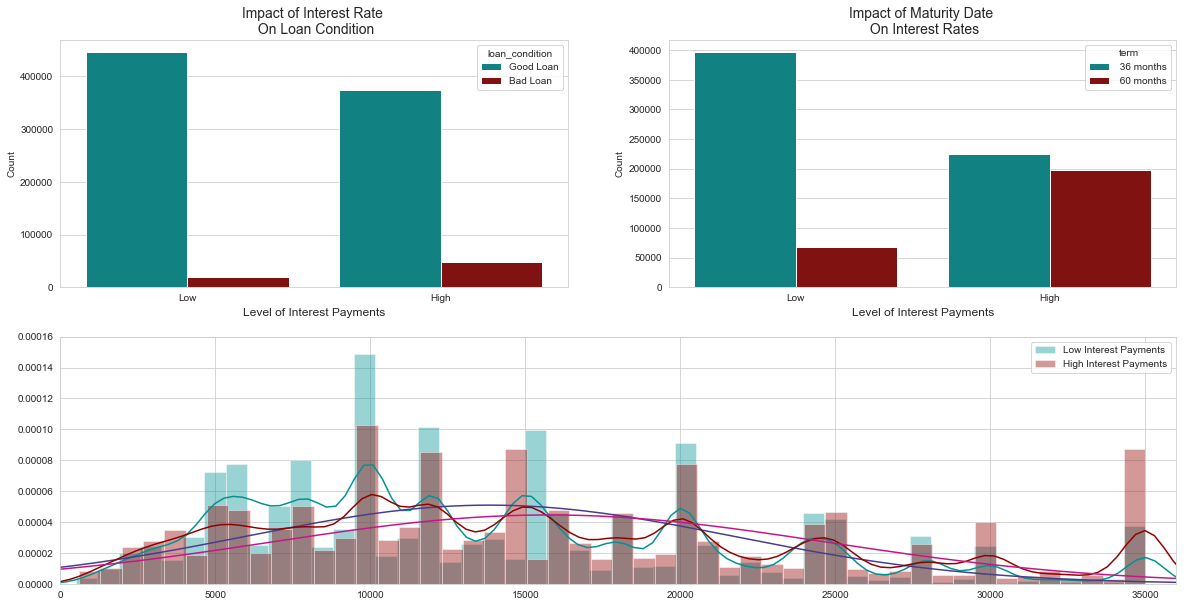

In [157]:
# Explore Interest Rates

plt.figure(figsize=(20,10))

palette = ['#009393','#930000']

plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df, palette=palette, hue='loan_condition')
ax.set_title('Impact of Interest Rate \n On Loan Condition', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax1 = sns.countplot(x='interest_payments', data=df, palette=palette, hue='term')
ax1.set_title('Impact of Maturity Date \n On Interest Rates', fontsize=14)
ax1.set_xlabel('Level of Interest Payments', fontsize=12)
ax1.set_ylabel('Count')

plt.subplot(212)
low = df['loan_amount'].loc[df['interest_payments'] == 'Low'].values
high = df['loan_amount'].loc[df['interest_payments'] == 'High'].values
ax2 = sns.distplot(low, color=palette[0], label='Low Interest Payments', fit=norm, fit_kws={'color':'#483d8b'})
ax3 = sns.distplot(high, color=palette[1], label='High Interest Payments', fit=norm, fit_kws={'color':'#c71585'})
plt.axis([0,36000,0,0.00016])
plt.legend()

plt.show()

In [158]:
# Explore Risk Assessment

avg_fully_paid = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Fully Paid'].values), 2)
avg_current = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Current'].values), 2) 
avg_issued = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Issued'].values), 2)
avg_long_fully_paid = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'].values), 2)

avg_default_rates = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Default'].values), 2)
avg_charged_off = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Charged Off'].values), 2)
avg_long_charged_off = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values), 2)
avg_grace_period = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'In Grace Period'].values), 2)
avg_short_late = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Late (16-30 days)'].values), 2)
avg_long_late = round(np.mean(df['interest_rate'].loc[df['loan_status'] == 'Late (31-120 days)'].values), 2)

data = [
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_fully_paid, avg_current, avg_issued, avg_long_fully_paid],
      theta = ['Fully Paid', 'Current', 'Issued', 'No C.P. Fully Paid'],
      fill = 'toself',
      name = 'Good Loans',
        line = dict(color = "#63AF63"),
      marker = dict(color = "#B3FFB3",symbol = "square",size = 8),
      subplot = "polar",),
    go.Scatterpolar(
        mode='lines+markers',
      r = [avg_default_rates, avg_charged_off, avg_long_charged_off, avg_grace_period, avg_short_late, avg_long_late],
      theta = ['Default Rate', 'Charged Off', 'C.P. Charged Off', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'],
      fill = 'toself',
      name = 'Bad Loans',
        line = dict(color = "#C31414"),
      marker = dict(color = "#FF5050",symbol = "square",size = 8),
      subplot = "polar2")]

layout = go.Layout(
    title="Average Interest Rates <br> Loan Status Distribution",
    showlegend = False,
     paper_bgcolor = "rgb(255, 248, 243)",
    polar = dict(
      domain = dict(
        x = [0,0.4],
        y = [0,1]),
      radialaxis = dict(
        tickfont = dict(
          size = 8)),
      angularaxis = dict(
        tickfont = dict(
          size = 8),
        rotation = 90,
        direction = "counterclockwise")),
    polar2 = dict(
      domain = dict(
        x = [0.6,1],
        y = [0,1]),
      radialaxis = dict(
        tickfont = dict(
          size = 8)),
      angularaxis = dict(
        tickfont = dict(
          size = 8),
        rotation = 90,
        direction = "clockwise"),))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar/directions')

In [159]:
# Explore Condition of Loans and Purpose

purpose_condition = round(pd.crosstab(df['loan_condition'], df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns

bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2)))

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2)))


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''),
    yaxis=dict(
        title='% of the Loan',),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

In [257]:
loan_count = df.groupby(['income_category','purpose'])['loan_condition'].apply(lambda x: x.value_counts())
loan_count = pd.DataFrame(loan_count).reset_index()

good_loans = loan_count[loan_count['level_2'] == 'Good Loan'].sort_values(by='income_category', ascending=True)
bad_loans = loan_count[loan_count['level_2'] == 'Bad Loan'].sort_values(by='income_category', ascending=True)
good_loans.rename(columns={'loan_condition':'good_loans_count'}, inplace=True)
bad_loans.rename(columns={'loan_condition':'bad_loans_count'}, inplace=True)
good_loans.drop(columns='level_2',inplace=True)
bad_loans.drop(columns='level_2', inplace=True)

interest_rate_df = df.groupby(['income_category', 'purpose'])['interest_rate'].mean()
interest_rate_df = pd.DataFrame(interest_rate_df).reset_index()
loan_amount_df = df.groupby(['income_category', 'purpose'])['loan_amount'].mean()
loan_amount_df = pd.DataFrame(loan_amount_df).reset_index()
loan_interest_df = pd.merge(interest_rate_df,loan_amount_df,how='inner',left_on=['income_category','purpose'], right_on=['income_category','purpose'])
loan_interest_df.rename(columns={'loan_amount':'total_loan_amount'},inplace=True)
loan_interest_df = loan_interest_df.round({'interest_rate':4,'total_loan_amount':2})

final_df = pd.merge(loan_interest_df,good_loans,how='inner',left_on=['income_category','purpose'], right_on=['income_category','purpose'])
final_df = pd.merge(final_df,bad_loans,how='inner',left_on=['income_category','purpose'], right_on=['income_category','purpose'])
final_df['total_loans_issued'] = final_df['good_loans_count'] + final_df['bad_loans_count']
final_df['bad/good ratio (%)'] = np.around((final_df['bad_loans_count']/final_df['total_loans_issued']),4)*100
final_df.style.background_gradient('coolwarm')

,income_category,purpose,interest_rate,total_loan_amount,good_loans_count,bad_loans_count,total_loans_issued,bad/good ratio (%)
0,High,car,10.3261,15669.5,114,5,119,4.2
1,High,credit_card,10.6067,26007.8,3694,131,3825,3.42
2,High,debt_consolidation,12.4677,25287.2,7992,399,8391,4.76
3,High,educational,11.42,11000,1,1,2,50
4,High,home_improvement,12.2257,24097.8,2085,108,2193,4.92
5,High,house,16.4604,25617.7,122,2,124,1.61
6,High,major_purchase,12.4163,22087.6,381,19,400,4.75
7,High,medical,14.2493,17861.8,145,14,159,8.81
8,High,moving,15.1508,18868.6,94,7,101,6.93
9,High,other,14.331,21365.5,835,52,887,5.86


In [259]:
purpose_labels = df['purpose'].unique()

high_income = final_df['interest_rate'].loc[final_df['income_category'] == 'High'].values.tolist()
medium_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Medium'].values.tolist()
low_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Low'].values.tolist()

high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]

trace1 = {"x": high_lst,
          "y": purpose_labels,
          "marker": {"color": "#0040FF", "size": 16},
          "mode": "markers",
          "name": "High Income",
          "type": "scatter"}

trace2 = {"x": med_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE9A2E", "size": 16},
          "mode": "markers",
          "name": "Medium Income",
          "type": "scatter",}

trace3 = {"x": low_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE2E2E", "size": 16},
          "mode": "markers",
          "name": "Low Income",
          "type": "scatter",}

data = [trace1, trace2, trace3]
layout = {"title": "Average Purpose Interest Rate <br> <i> by Income Category </i> ",
          "xaxis": {"title": "Average Interest Rate", },
          "yaxis": {"title": ""}}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [263]:
final_df = final_df.sort_values(by='purpose', ascending=False)

# Labels
purpose_labels = final_df['purpose'].unique()

# Amount of Good and Bad Loans per Purpose (fill by income category)
# Good Loans
good_high_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "High"].values.tolist()
good_med_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "Medium"].values.tolist()
good_low_cnt = final_df['good_loans_count'].loc[final_df['income_category'] == "Low"].values.tolist()

# Bad Loans
bad_high_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "High"].values.tolist()
bad_med_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "Medium"].values.tolist()
bad_low_cnt = final_df['bad_loans_count'].loc[final_df['income_category'] == "Low"].values.tolist()

# Good Loans
trace0 = go.Bar(
    y=purpose_labels,
    x=good_high_cnt,
    legendgroup='a',
    name='High Income',
    orientation='h', 
    marker=dict(
        color='#0040FF'
    )
)
trace1 = go.Bar(
    x=good_med_cnt,
    y=purpose_labels,
    legendgroup='a',
    name='Medium Income',
    orientation='h',
    marker=dict(
        color='#FE9A2E',
    )
)

trace2 = go.Bar(
    x=good_low_cnt,
    y=purpose_labels,
    legendgroup='a',
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#FE2E2E',
    )
)

# Bad Loans issued by Income Category
trace3 = go.Bar(
    y=purpose_labels,
    x=bad_high_cnt,
    legendgroup='b',
    showlegend=False,
    name='High Income',
    orientation='h', 
    marker=dict(
        color='#0040FF'
    )
)
trace4 = go.Bar(
    x=bad_med_cnt,
    y=purpose_labels,
    legendgroup='b',
    showlegend=False,
    name='Medium Income',
    orientation='h',
    marker=dict(
        color='#FE9A2E',
    )
)

trace5 = go.Bar(
    x=bad_low_cnt,
    y=purpose_labels,
    legendgroup='b',
    showlegend=False,
    name='Low Income',
    orientation='h',
    marker=dict(
        color='#FE2E2E',
    )
)

fig = tools.make_subplots(rows=2, cols=1, print_grid=False,
                         subplot_titles=("Amount of <br> <i>Good Loans Issued</i>",
                                        "Amount of <br> <i>Bad Loans Issued</i>"))

# First Subplot
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# Second Subplot
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 1)

fig['layout'].update(height=800, width=800, title='Issuance of Loans', showlegend=True, xaxis=dict(title="Number of Loans Issued"))
iplot(fig, filename='angled-text-bar')

In [264]:
high_ratio = final_df.loc[final_df['income_category'] == 'High']
medium_ratio = final_df.loc[final_df['income_category'] == 'Medium']
low_ratio = final_df.loc[final_df['income_category'] == 'Low']

data = [
    go.Scatterpolar(
        mode='lines+markers',
      r = high_ratio['bad/good ratio (%)'].values.tolist(),
      theta = high_ratio['purpose'].unique(),
      fill = 'toself',
      name = 'High Income',
        line = dict(
        color = "#63AF63"
      ),
      marker = dict(
        color = "#B3FFB3",
        symbol = "square",
        size = 8
      ),
      subplot = "polar",
    ),
    go.Scatterpolar(
        mode='lines+markers',
      r = medium_ratio['bad/good ratio (%)'].values.tolist(),
      theta = medium_ratio['purpose'].unique(),
      fill = 'toself',
      name = 'Medium Income',
        line = dict(
        color = "#C31414"
      ),
      marker = dict(
        color = "#FF5050",
        symbol = "square",
        size = 8
      ),
      subplot = "polar2"
    ),
    go.Scatterpolar(
        mode='lines+markers',
      r = low_ratio['bad/good ratio (%)'].values.tolist(),
      theta = low_ratio['purpose'].unique(),
      fill = 'toself',
      name = 'Low Income',
        line = dict(
        color = "#C9FFC7"
      ),
      marker = dict(
        color = "#8CB28B",
        symbol = "square",
        size = 8
      ),
      subplot = "polar3"
    ),
]

layout = go.Layout(
    title="Bad/Good Ratio <br> (By Purpose)",
    showlegend = False,
     paper_bgcolor = "rgb(255, 206, 153)",
    polar = dict(
      domain = dict(
        x = [0,0.3],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 6
        ),
        rotation = 90,
        direction = "counterclockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0.35,0.65],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 6
        ),
        rotation = 85,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
        x = [0.7, 1],
        y = [0,1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 6
        ),
        rotation = 90,
        direction = "clockwise"
      ),
    ))

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "radar/multiple")

In [276]:
# Feature Engineering and Neural Networks

complete_df = df.copy()

columns = ['dti_joint', 'annual_inc_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
           'open_il_24m', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
           'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'total_bal_il', 'tot_coll_amt',
           'tot_cur_bal', 'total_rev_hi_lim', 'revol_util', 'collections_12_mths_ex_med', 'open_acc', 'inq_last_6mths',
           'verification_status_joint', 'acc_now_delinq']

complete_df[columns] = complete_df[columns].fillna(0)

complete_df['pub_rec'] = complete_df.groupby('region')['pub_rec'].apply(lambda x: x.fillna(x.mean()))
complete_df['annual_income'] = complete_df.groupby('region')['annual_income'].apply(lambda x: x.fillna(x.mean()))
complete_df['total_acc'] = complete_df.groupby('region')['total_acc'].apply(lambda x: x.fillna(x.mean()))
complete_df['delinq_2yrs'] = complete_df.groupby('region')['delinq_2yrs'].apply(lambda x: x.fillna(x.mean()))

columns_to_drop = ['issue_d', 'income_category', 'region', 'year', 'emp_length', 'loan_condition',
                 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                 'verification_status_joint', 'emp_length_int', 'total_rec_prncp', 'funded_amount', 'investor_funds', 
                 'sub_grade', 'complete_date', 'loan_status', 'interest_payments', 
                 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
               'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
               'collection_recovery_fee', 'last_pymnt_amnt',
               'collections_12_mths_ex_med', 'mths_since_last_major_derog',
               'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
               'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
               'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
               'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

complete_df.drop(columns_to_drop, axis=1, inplace=True)

In [280]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(complete_df, complete_df['loan_condition_int']):
    stratified_train = complete_df.loc[train_set]
    stratified_test = complete_df.loc[test_set]
    
print('Train set ratio \n', stratified_train["loan_condition_int"].value_counts()/len(stratified_train))
print('Test set ratio \n', stratified_test["loan_condition_int"].value_counts()/len(stratified_test)) 

Train set ratio 
 1    0.924014
0    0.075986
Name: loan_condition_int, dtype: float64
Test set ratio 
 1    0.924012
0    0.075988
Name: loan_condition_int, dtype: float64
